# Decision Tree  

## Data set : titanic_dataset

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(r'C:\Users\nitis\python_project\ML\week9 KNN NB DT\DT\titanic_dataset.csv')
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#filling with missing values with arbitary value
data = data.fillna(value = '0')
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500     0        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250     0        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500     0        S

In [39]:
deletcol = ['Age','Name','Ticket','Cabin','Parch','PassengerId']
X = data.drop(deletcol, axis = 1)
X.head()

Survived  Pclass     Sex  SibSp     Fare Embarked
0         0       3    male      1   7.2500        S
1         1       1  female      1  71.2833        C
2         1       3  female      0   7.9250        S
3         1       1  female      1  53.1000        S
4         0       3    male      0   8.0500        S

In [41]:
target_column = 'Survived'
feature_columns = [col for col in X.columns if col != target_column]
x = X[feature_columns]
y = X[target_column]

In [42]:
x = pd.DataFrame(x, columns=feature_columns)

In [44]:
categorical_columns = [col for col in x.columns if x[col].dtype == 'object']
if categorical_columns:
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        x[col] = le.fit_transform(x[col])
        label_encoders[col] = le

In [45]:
splits =  [2,3,4,5,6,7,8,9] 
random_states = [0, 42]

In [47]:
result = []
for split_size in splits:
    split_size = split_size / 10
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=split_size, random_state=random_state , shuffle=True)
        clf = DecisionTreeClassifier()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        result.append(["DT","titanic_datatset", split_size, random_state, accuracy])

result = pd.DataFrame(result, columns=["Model","Data_SET","train-test-split","Random_State","accuracy_score"])

In [49]:
result

Model          Data_SET  train-test-split  Random_State  accuracy_score
0     DT  titanic_datatset               0.2             0        0.826816
1     DT  titanic_datatset               0.2            42        0.804469
2     DT  titanic_datatset               0.3             0        0.809701
3     DT  titanic_datatset               0.3            42        0.809701
4     DT  titanic_datatset               0.4             0        0.781513
5     DT  titanic_datatset               0.4            42        0.775910
6     DT  titanic_datatset               0.5             0        0.800448
7     DT  titanic_datatset               0.5            42        0.753363
8     DT  titanic_datatset               0.6             0        0.764486
9     DT  titanic_datatset               0.6            42        0.740187
10    DT  titanic_datatset               0.7             0        0.733974
11    DT  titanic_datatset               0.7            42        0.741987
12    DT  titanic_datatset               0.8             0        0.705470
13    DT  titanic_datatset               0.8            42        0.784011
14    DT  titanic_datatset               0.9             0        0.724439
15    DT  titanic_datatset               0.9            42        0.790524

In [52]:
# On Best Split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0 )
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
ac = accuracy_score(y_test, y_pred)
ac

0.8156424581005587

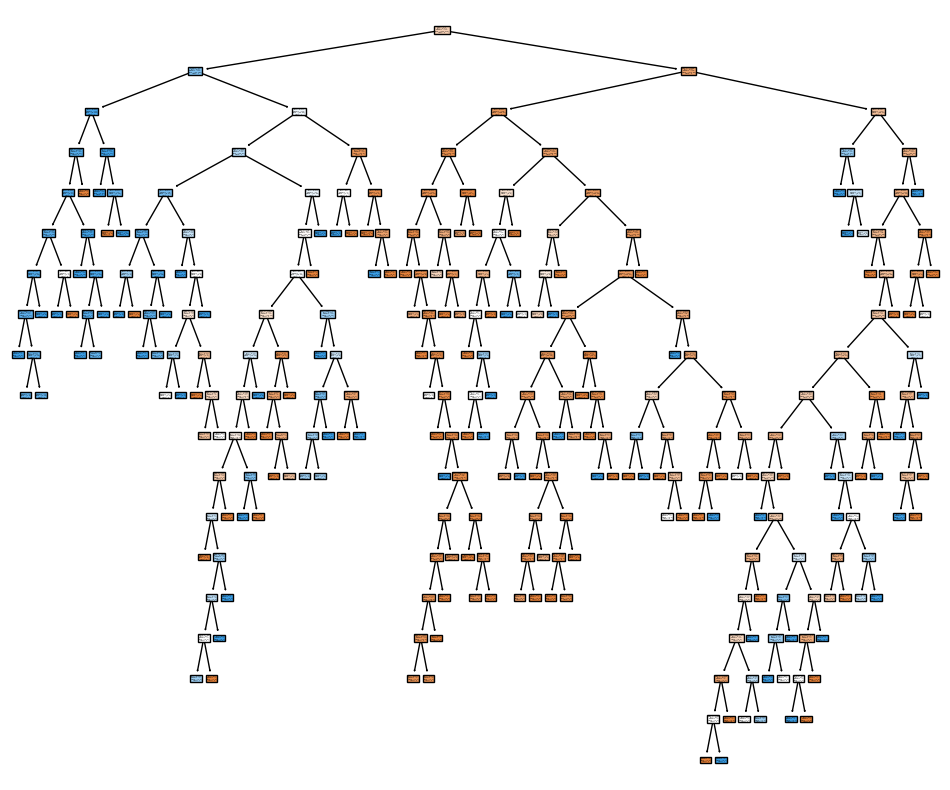

In [56]:
class_names = [str(class_label) for class_label in data[target_column].unique()]
plt.figure(figsize=(12, 10))
plot_tree(clf, filled=True, feature_names=feature_columns, class_names=class_names)
plt.show()

In [59]:
x.columns

Index(['Pclass', 'Sex', 'SibSp', 'Fare', 'Embarked'], dtype='object')

In [61]:
tree.export_graphviz(clf, out_file='titanic.dot', feature_names=['Pclass', 'Sex', 'SibSp', 'Fare', 'Embarked'])

In [63]:
result.to_excel("DT_titanic_064.xlsx")